#  Part 1-GDP Analysis of the Indian States:-

### Part 1-A

In [15]:
#import all the required librairies and module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import seaborn as sns


#PART-1A
df=pd.read_csv("../Downloads/GDP/gsdp.csv")
print("Original Dataframe-")
df





Original Dataframe-


,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [16]:
#1A.1-Remove '2016-17' Rows

df_1=df[df['Duration'] != '2016-17']
df_1

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [17]:
#1A.2-Calculate the average growth of states over 2013-14,2014-15, and 2015-16 and plot the bar graph

df_2=df_1.iloc[6:9]
df_2

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [19]:
#drop the west bangal column as it has maximm null values
df_3=pd.DataFrame(df_2.mean(axis=0).sort_values())
df_3.columns=['Mean']
df_3=df_3.drop(['West Bengal1', 'All_India GDP'])
df_3['State']=df_3.index
df_3

,Mean,State
Goa,6.033333,Goa
Meghalaya,6.953333,Meghalaya
Odisha,9.836667,Odisha
Sikkim,10.486667,Sikkim
Jammu & Kashmir,10.900000,Jammu & Kashmir
Gujarat,11.126667,Gujarat
Punjab,11.185000,Punjab
Maharashtra,11.260000,Maharashtra
Rajasthan,11.320000,Rajasthan
Jharkhand,11.500000,Jharkhand


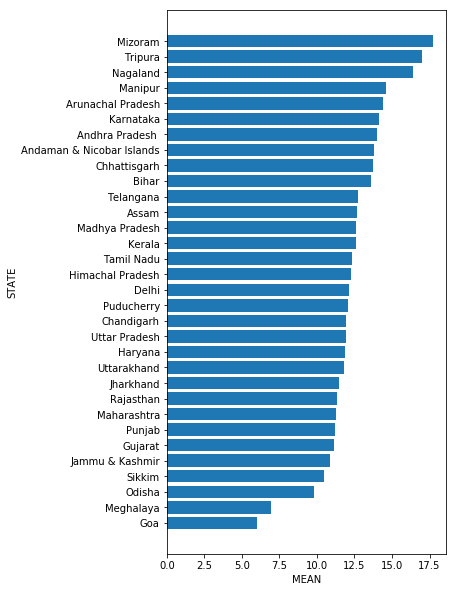

In [20]:
#Graph between state and mean
plt.figure(figsize=(5,10))
plt.barh(df_3['State'],df_3['Mean'])
plt.ylabel("STATE")
plt.xlabel("MEAN")
plt.show()

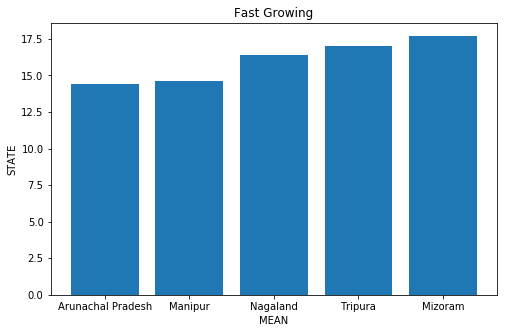

In [21]:
#top 5 fast growing states
plt.figure(figsize=(8,5))
df_4=df_3[-5:]
plt.title("Fast Growing")
plt.bar(df_4['State'],df_4['Mean'])
plt.ylabel("STATE")
plt.xlabel("MEAN")
plt.show()

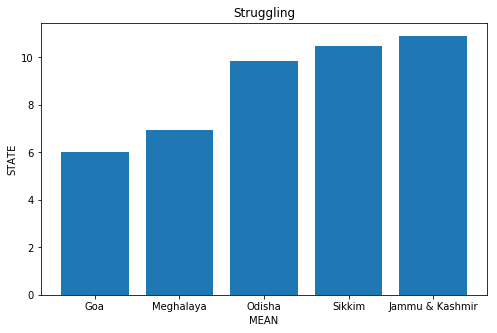

In [22]:
#top 5 struggling states
plt.figure(figsize=(8,5))
df_4=df_3[0:5]
plt.title("Struggling")
plt.bar(df_4['State'],df_4['Mean'])
plt.ylabel("STATE")
plt.xlabel("MEAN")
plt.show()

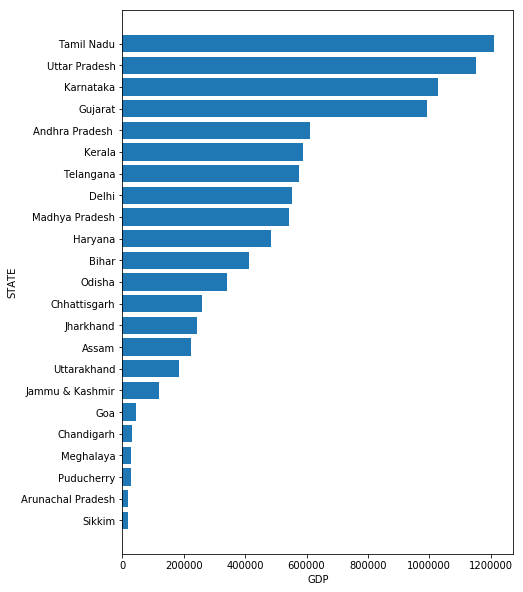

In [23]:
#1A.3-Plot the total GDP of the states for the year 2015-16

df_5=df_1.iloc[4:5]
df_5=pd.DataFrame(df_5.mean(axis=0).sort_values ())
df_5.columns=['GDP']
df_5=df_5.iloc[0:23]
df_5['State']=df_5.index

plt.figure(figsize=(7,10))
plt.barh(df_5['State'],df_5['GDP'])
plt.ylabel("STATE")
plt.xlabel("GDP")
plt.show()




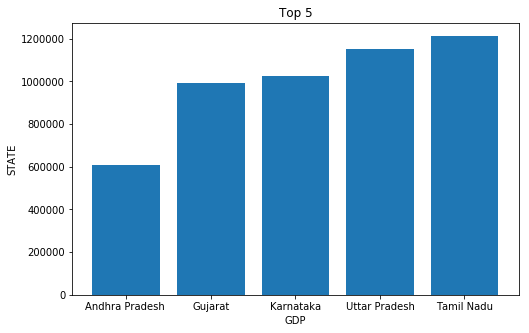

In [24]:
#top 5 GDP
plt.figure(figsize=(8,5))
df_6=df_5[-5:]
plt.title("Top 5")
plt.bar(df_6['State'],df_6['GDP'])
plt.ylabel("STATE")
plt.xlabel("GDP")
plt.show()

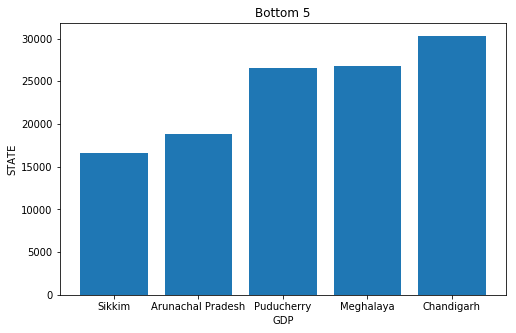

In [25]:
#Bottom 5 GDP
plt.figure(figsize=(8,5))
df_6=df_5[0:5]
plt.title("Bottom 5")
plt.bar(df_6['State'],df_6['GDP'])
plt.ylabel("STATE")
plt.xlabel("GDP")
plt.show()

# Part 1-B

In [27]:
from glob import glob

list_of_files=glob("../Downloads/GDP/*.csv")
l=len(list_of_files)
list_of_dataframe=[]
list_of_files=list_of_files[1:l-1]

for i in list_of_files:
    s=i.split("-")[1]
    s=s.split("_")
    s=' '.join(s)
    if s != 'Delhi' and s!= 'Chandigarh' and s != 'Puducherry':
        df_2=pd.read_csv(i,index_col=None , header=0, encoding="ISO-8859-1")
        df_2["State"]=s
        list_of_dataframe.append(df_2)

merge_df=pd.concat(list_of_dataframe,axis=0, ignore_index=True,sort=False)

pivot=merge_df.pivot_table(index="Item" ,columns=["State"], values=['2014-15'])
pivot.head()


2014-15  \
State                                            Andhra Pradesh   
Item                                                              
Agriculture, forestry and fishing                    14819416.0   
Air transport                                           14900.0   
Communication & services related to broadcasting       928756.0   
Construction                                          4664889.0   
Crops                                                 7893514.0   

                                                                               \
State                                            Arunachal Pradesh      Assam   
Item                                                                            
Agriculture, forestry and fishing                         686117.0  3855548.0   
Air transport                                                  0.0    26223.0   
Communication & services related to broadcasting           19568.0   357619.0   
Construction                                              147842.0  1733568.0   
Crops                                                     415520.0  2890544.0   

                                                                          \
State                                                 Bihar Chhattisgarh   
Item                                                                       
Agriculture, forestry and fishing                 7951890.0    3948847.0   
Air transport                                       13599.0       9507.0   
Communication & services related to broadcasting   919427.0     294552.0   
Construction                                      3449763.0    2669855.0   
Crops                                             4688237.0    2613371.0   

                                                                        \
State                                                  Goa     Gujarat   
Item                                                                     
Agriculture, forestry and fishing                 308507.0  13769969.0   
Air transport                                      46359.0         NaN   
Communication & services related to broadcasting   44028.0   1242520.0   
Construction                                      165819.0   5526017.0   
Crops                                             140421.0   9671086.0   

                                                                              \
State                                               Haryana Himachal Pradesh   
Item                                                                           
Agriculture, forestry and fishing                 8015238.0        1514981.0   
Air transport                                           NaN           3979.0   
Communication & services related to broadcasting   479658.0         194266.0   
Construction                                      3702571.0         808256.0   
Crops                                             4636731.0         853758.0   

                                                             ...            \
State                                             Jharkhand  ...  Nagaland   
Item                                                         ...             
Agriculture, forestry and fishing                 3211065.0  ...  607897.0   
Air transport                                        6716.0  ...    4153.0   
Communication & services related to broadcasting   323214.0  ...   37794.0   
Construction                                      1789834.0  ...  156072.0   
Crops                                             2094466.0  ...  375825.0   

                                                                        \
State                                                Odisha     Punjab   
Item                                                                     
Agriculture, forestry and fishing                 6422978.0  9285716.0   
Air transport                                       15354.0     4473.0   
Communication & services related

In [28]:
df_3=pivot.iloc[[9,15,17,24,31],:]
df_3=df_3.transpose()
df_3.head()

Item                       Gross State Domestic Product  \
        State                                             
2014-15 Andhra Pradesh                       52646842.0   
        Arunachal Pradesh                     1676119.0   
        Assam                                19809800.0   
        Bihar                                37391988.0   
        Chhattisgarh                         23498180.0   

Item                       Per Capita GSDP (Rs.)     Primary   Secondary  \
        State                                                              
2014-15 Andhra Pradesh                  104977.0  16303716.0  10488884.0   
        Arunachal Pradesh               112718.0    716959.0    287489.0   
        Assam                            60621.0   5326697.0   4033091.0   
        Bihar                            33954.0   8019997.0   5984896.0   
        Chhattisgarh                     86860.0   6400817.0   8238886.0   

Item                         Tertiary  
        State                          
2014-15 Andhra Pradesh     22032942.0  
        Arunachal Pradesh    631844.0  
        Assam               9307109.0  
        Bihar              22179969.0  
        Chhattisgarh        7588778.0

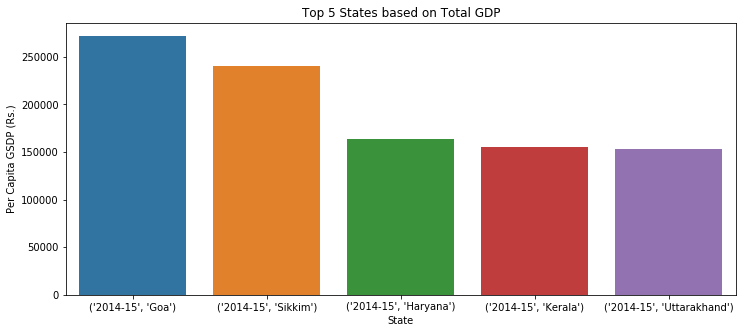

In [29]:
#top 5 States based on total GDP

df_4=df_3.sort_values("Per Capita GSDP (Rs.)", ascending=False)
df_4=df_4.head(5)
plt.figure(figsize=(12,5))
sns.barplot(x=df_4.index,y=df_4["Per Capita GSDP (Rs.)"],data=df_4)
plt.ylabel("Per Capita GSDP (Rs.)")
plt.xlabel("State")
plt.title("Top 5 States based on Total GDP")
plt.show()

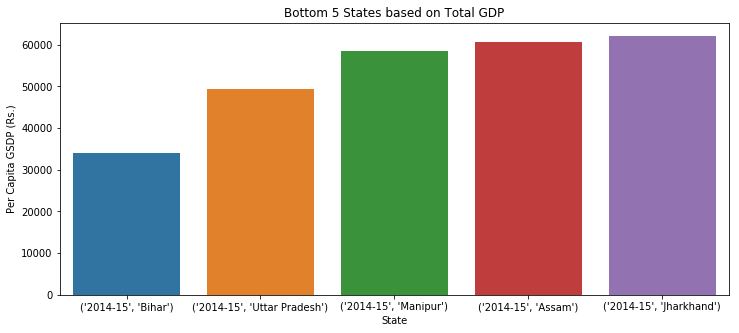

In [30]:
#bottom 5 states based on total GDP

df_4=df_3.sort_values("Per Capita GSDP (Rs.)", ascending=True)
df_4=df_4.head(5)
plt.figure(figsize=(12,5))
sns.barplot(x=df_4.index,y=df_4["Per Capita GSDP (Rs.)"],data=df_4)
plt.ylabel("Per Capita GSDP (Rs.)")
plt.xlabel("State")
plt.title("Bottom 5 States based on Total GDP")
plt.show()

In [31]:
#ratio of maximum GDP and minimum GDP

df_4=df_3.sort_values("Per Capita GSDP (Rs.)", ascending=False)
df_5=df_4.max()/df_4.min()
print("Ratio=",df_5["Per Capita GSDP (Rs.)"])

Ratio= 8.004741709371503


In [32]:
df_6=pivot.iloc[[9,15,17,24,31],:]
per_df=df_6.T
per_df["Primary %"] = per_df['Primary']/per_df['Gross State Domestic Product']*100
per_df["Secondary %"] = per_df['Secondary']/per_df['Gross State Domestic Product']*100
per_df["Tertiary %"] = per_df['Tertiary']/per_df['Gross State Domestic Product']*100
per_df.head()

Item                       Gross State Domestic Product  \
        State                                             
2014-15 Andhra Pradesh                       52646842.0   
        Arunachal Pradesh                     1676119.0   
        Assam                                19809800.0   
        Bihar                                37391988.0   
        Chhattisgarh                         23498180.0   

Item                       Per Capita GSDP (Rs.)     Primary   Secondary  \
        State                                                              
2014-15 Andhra Pradesh                  104977.0  16303716.0  10488884.0   
        Arunachal Pradesh               112718.0    716959.0    287489.0   
        Assam                            60621.0   5326697.0   4033091.0   
        Bihar                            33954.0   8019997.0   5984896.0   
        Chhattisgarh                     86860.0   6400817.0   8238886.0   

Item                         Tertiary  Primary %  Secondary %  Tertiary %  
        State                                                              
2014-15 Andhra Pradesh     22032942.0  30.968080    19.923102   41.850453  
        Arunachal Pradesh    631844.0  42.774946    17.152064   37.696846  
        Assam               9307109.0  26.889201    20.359070   46.982347  
        Bihar              22179969.0  21.448437    16.005825   59.317437  
        Chhattisgarh        7588778.0  27.239629    35.061805   32.295173

In [33]:
#Drop some columns for further calculation
df_per=per_df.drop(columns=["Gross State Domestic Product", "Per Capita GSDP (Rs.)","Primary", "Secondary", "Tertiary"])
df_per.head()

Item                       Primary %  Secondary %  Tertiary %
        State                                                
2014-15 Andhra Pradesh     30.968080    19.923102   41.850453
        Arunachal Pradesh  42.774946    17.152064   37.696846
        Assam              26.889201    20.359070   46.982347
        Bihar              21.448437    16.005825   59.317437
        Chhattisgarh       27.239629    35.061805   32.295173

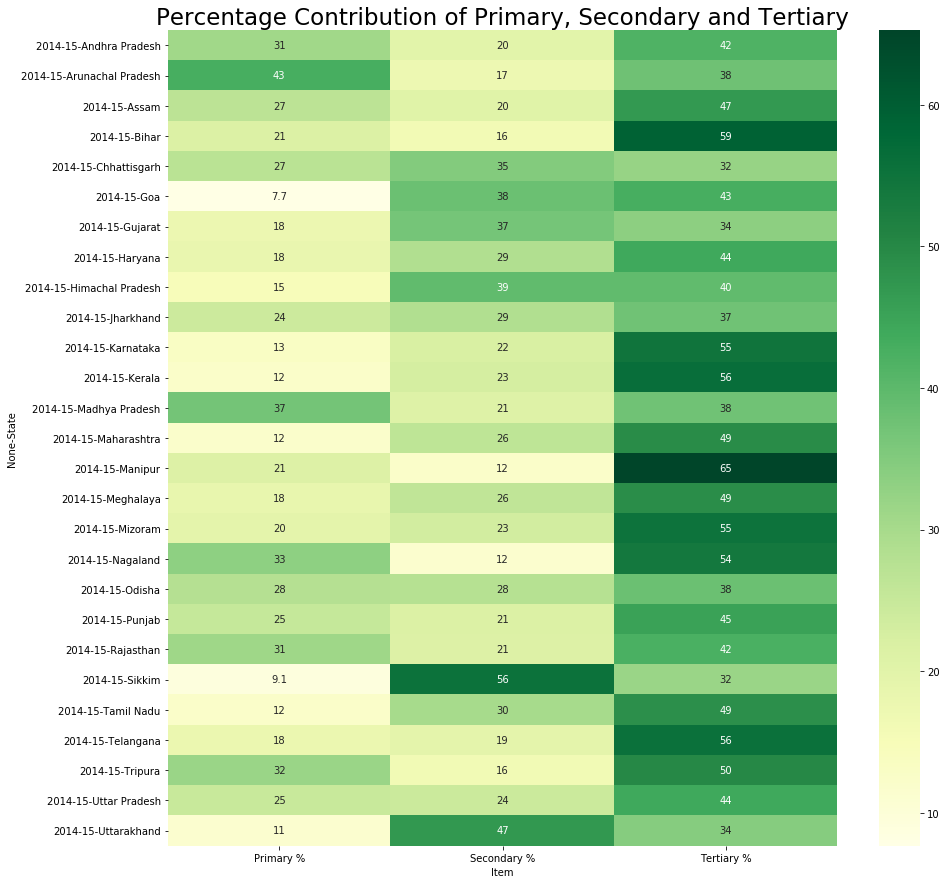

In [36]:
## Plotting the percentage contribution of primary, secondary and tertiary

plt.figure(figsize=(15,15))
plt.title("Percentage Contribution of Primary, Secondary and Tertiary", size = 23)
df_per_1 = sns.heatmap(df_per,cmap="YlGn", annot = True )


In [37]:
#calculate percentile
category_df=df_6.T
category_df["%tile"] = category_df["Per Capita GSDP (Rs.)"].rank(pct = True)
category_df.head()

Item                       Gross State Domestic Product  \
        State                                             
2014-15 Andhra Pradesh                       52646842.0   
        Arunachal Pradesh                     1676119.0   
        Assam                                19809800.0   
        Bihar                                37391988.0   
        Chhattisgarh                         23498180.0   

Item                       Per Capita GSDP (Rs.)     Primary   Secondary  \
        State                                                              
2014-15 Andhra Pradesh                  104977.0  16303716.0  10488884.0   
        Arunachal Pradesh               112718.0    716959.0    287489.0   
        Assam                            60621.0   5326697.0   4033091.0   
        Bihar                            33954.0   8019997.0   5984896.0   
        Chhattisgarh                     86860.0   6400817.0   8238886.0   

Item                         Tertiary     %tile  
        State                                    
2014-15 Andhra Pradesh     22032942.0  0.518519  
        Arunachal Pradesh    631844.0  0.555556  
        Assam               9307109.0  0.148148  
        Bihar              22179969.0  0.037037  
        Chhattisgarh        7588778.0  0.407407

In [38]:
#Generate categories
category_df["Category"] = pd.qcut(category_df["Per Capita GSDP (Rs.)"],[0,0.20,0.50,0.85,1], labels= ["C4","C3","C2","C1"])
category_df.head()

Item                       Gross State Domestic Product  \
        State                                             
2014-15 Andhra Pradesh                       52646842.0   
        Arunachal Pradesh                     1676119.0   
        Assam                                19809800.0   
        Bihar                                37391988.0   
        Chhattisgarh                         23498180.0   

Item                       Per Capita GSDP (Rs.)     Primary   Secondary  \
        State                                                              
2014-15 Andhra Pradesh                  104977.0  16303716.0  10488884.0   
        Arunachal Pradesh               112718.0    716959.0    287489.0   
        Assam                            60621.0   5326697.0   4033091.0   
        Bihar                            33954.0   8019997.0   5984896.0   
        Chhattisgarh                     86860.0   6400817.0   8238886.0   

Item                         Tertiary     %tile Category  
        State                                             
2014-15 Andhra Pradesh     22032942.0  0.518519       C3  
        Arunachal Pradesh    631844.0  0.555556       C2  
        Assam               9307109.0  0.148148       C4  
        Bihar              22179969.0  0.037037       C4  
        Chhattisgarh        7588778.0  0.407407       C3

In [39]:
#merging the dataframes for further calculation
df_7= pivot.T
df_7 = pd.merge(df_7,category_df, on = "State")
df_7.head()

Item,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product_x,...,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport,Gross State Domestic Product_y,Per Capita GSDP (Rs.)_y,Primary_y,Secondary_y,Tertiary_y,%tile,Category
State,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,14819416.0,14900.0,928756.0,4664889.0,7893514.0,1151729.0,1900863.0,2270664.0,346160.0,52646842.0,...,4233400.0,5076984.0,94200.0,52646842.0,104977.0,16303716.0,10488884.0,22032942.0,0.518519,C3
Arunachal Pradesh,686117.0,0.0,19568.0,147842.0,415520.0,113527.0,25207.0,8193.0,224017.0,1676119.0,...,60421.0,35203.0,0.0,1676119.0,112718.0,716959.0,287489.0,631844.0,0.555556,C2
Assam,3855548.0,26223.0,357619.0,1733568.0,2890544.0,296587.0,543651.0,529539.0,261987.0,19809800.0,...,2987155.0,1194568.0,4502.0,19809800.0,60621.0,5326697.0,4033091.0,9307109.0,0.148148,C4
Bihar,7951890.0,13599.0,919427.0,3449763.0,4688237.0,345168.0,1178022.0,653224.0,550132.0,37391988.0,...,7448373.0,3147173.0,2228.0,37391988.0,33954.0,8019997.0,5984896.0,22179969.0,0.037037,C4
Chhattisgarh,3948847.0,9507.0,294552.0,2669855.0,2613371.0,1198438.0,739057.0,385483.0,597785.0,23498180.0,...,1535571.0,871770.0,0.0,23498180.0,86860.0,6400817.0,8238886.0,7588778.0,0.407407,C3


In [40]:
df_8=df_7.sort_values(by="Category",ascending = False)
df_8.head()

Item,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product_x,...,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport,Gross State Domestic Product_y,Per Capita GSDP (Rs.)_y,Primary_y,Secondary_y,Tertiary_y,%tile,Category
State,,,,,,,,,,,,,,,,,,,,,
Kerala,5930617.0,125029.0,884767.0,7314003.0,3070386.0,482470.0,2010306.0,704319.0,499808.0,52600230.0,...,8557345.0,4020934.0,26956.0,52600230.0,154778.0,6489442.0,12070040.0,29673778.0,0.888889,C1
Goa,308507.0,46359.0,44028.0,165819.0,140421.0,204110.0,233618.0,122201.0,15744.0,4063307.0,...,380927.0,189656.0,17820.0,4063307.0,271793.0,312129.0,1547536.0,1738217.0,1.000000,C1
Sikkim,137447.0,0.0,12064.0,82058.0,114976.0,212499.0,21079.0,604.0,4529.0,1520933.0,...,70568.0,47347.0,0.0,1520933.0,240274.0,138776.0,845253.0,483103.0,0.962963,C1
Haryana,8015238.0,NaN,479658.0,3702571.0,4636731.0,1101919.0,1671486.0,110080.0,352254.0,43746207.0,...,4986319.0,2560623.0,NaN,43746207.0,164077.0,8040424.0,12561411.0,19226568.0,0.925926,C1
Uttarakhand,1601423.0,3889.0,733778.0,1342733.0,866146.0,433880.0,385030.0,4796.0,339293.0,16198529.0,...,1743106.0,1066693.0,NaN,16198529.0,153076.0,1845972.0,7642865.0,5587975.0,0.851852,C2


In [41]:
# Shorting by Category and Gross State Domestic Product
df_9 = df_8[["Category", "Agriculture, forestry and fishing", "Mining and quarrying","Manufacturing","Electricity, gas, water supply & other utility services", "Construction", "Trade, repair, hotels and restaurants", "Transport, storage, communication & services related to broadcasting", "Financial services", "Real estate, ownership of dwelling & professional services", "Public administration", "Other services","Gross State Domestic Product_x"]]
sorted_df = df_9.sort_values(by = ["Category","Gross State Domestic Product_x"], ascending = False)
sorted_df.head()

Item,Category,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product_x
State,,,,,,,,,,,,,
Kerala,C1,5930617.0,558824.0,4273567.0,482470.0,7314003.0,8557345.0,4020934.0,2010306.0,7287633.0,2068915.0,5728645.0,52600230.0
Haryana,C1,8015238.0,25186.0,7756921.0,1101919.0,3702571.0,4986319.0,2560623.0,1671486.0,6970183.0,1036377.0,2001581.0,43746207.0
Goa,C1,308507.0,3622.0,1177608.0,204110.0,165819.0,380927.0,189656.0,233618.0,407099.0,346486.0,180431.0,4063307.0
Sikkim,C1,137447.0,1329.0,550697.0,212499.0,82058.0,70568.0,47347.0,21079.0,75330.0,119514.0,149265.0,1520933.0
Maharashtra,C2,16475655.0,5282727.0,33660294.0,4334702.0,9450211.0,15839100.0,9697246.0,16143324.0,30718051.0,5426991.0,10806363.0,179212165.0


In [42]:
#calculate the total of each category
df_10 = df_9.groupby("Category").sum()
df_10

Item,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product_x
Category,,,,,,,,,,,,
C4,56735044.0,6096419.0,24987032.0,4310264.0,22775948.0,27484595.0,16191800.0,7684498.0,24177534.0,13486630.0,15859015.0,233252066.0
C3,42226888.0,10835771.0,22038331.0,4604774.0,15707921.0,17245309.0,12231484.0,5766226.0,16224118.0,7927173.0,12815417.0,177966387.0
C2,75209022.0,10373346.0,109196530.0,13823378.0,40653562.0,61238862.0,33749808.0,36296642.0,92121446.0,18567815.0,36253657.0,586380452.0
C1,14391809.0,588961.0,13758793.0,2000998.0,11264451.0,13995159.0,6818560.0,3936489.0,14740245.0,3571292.0,8059922.0,101930677.0


In [43]:
#transpose the dataframe
df_11=df_10.T
df_11.head()

Category,C4,C3,C2,C1
Item,,,,
"Agriculture, forestry and fishing",56735044.0,42226888.0,75209022.0,14391809.0
Mining and quarrying,6096419.0,10835771.0,10373346.0,588961.0
Manufacturing,24987032.0,22038331.0,109196530.0,13758793.0
"Electricity, gas, water supply & other utility services",4310264.0,4604774.0,13823378.0,2000998.0
Construction,22775948.0,15707921.0,40653562.0,11264451.0


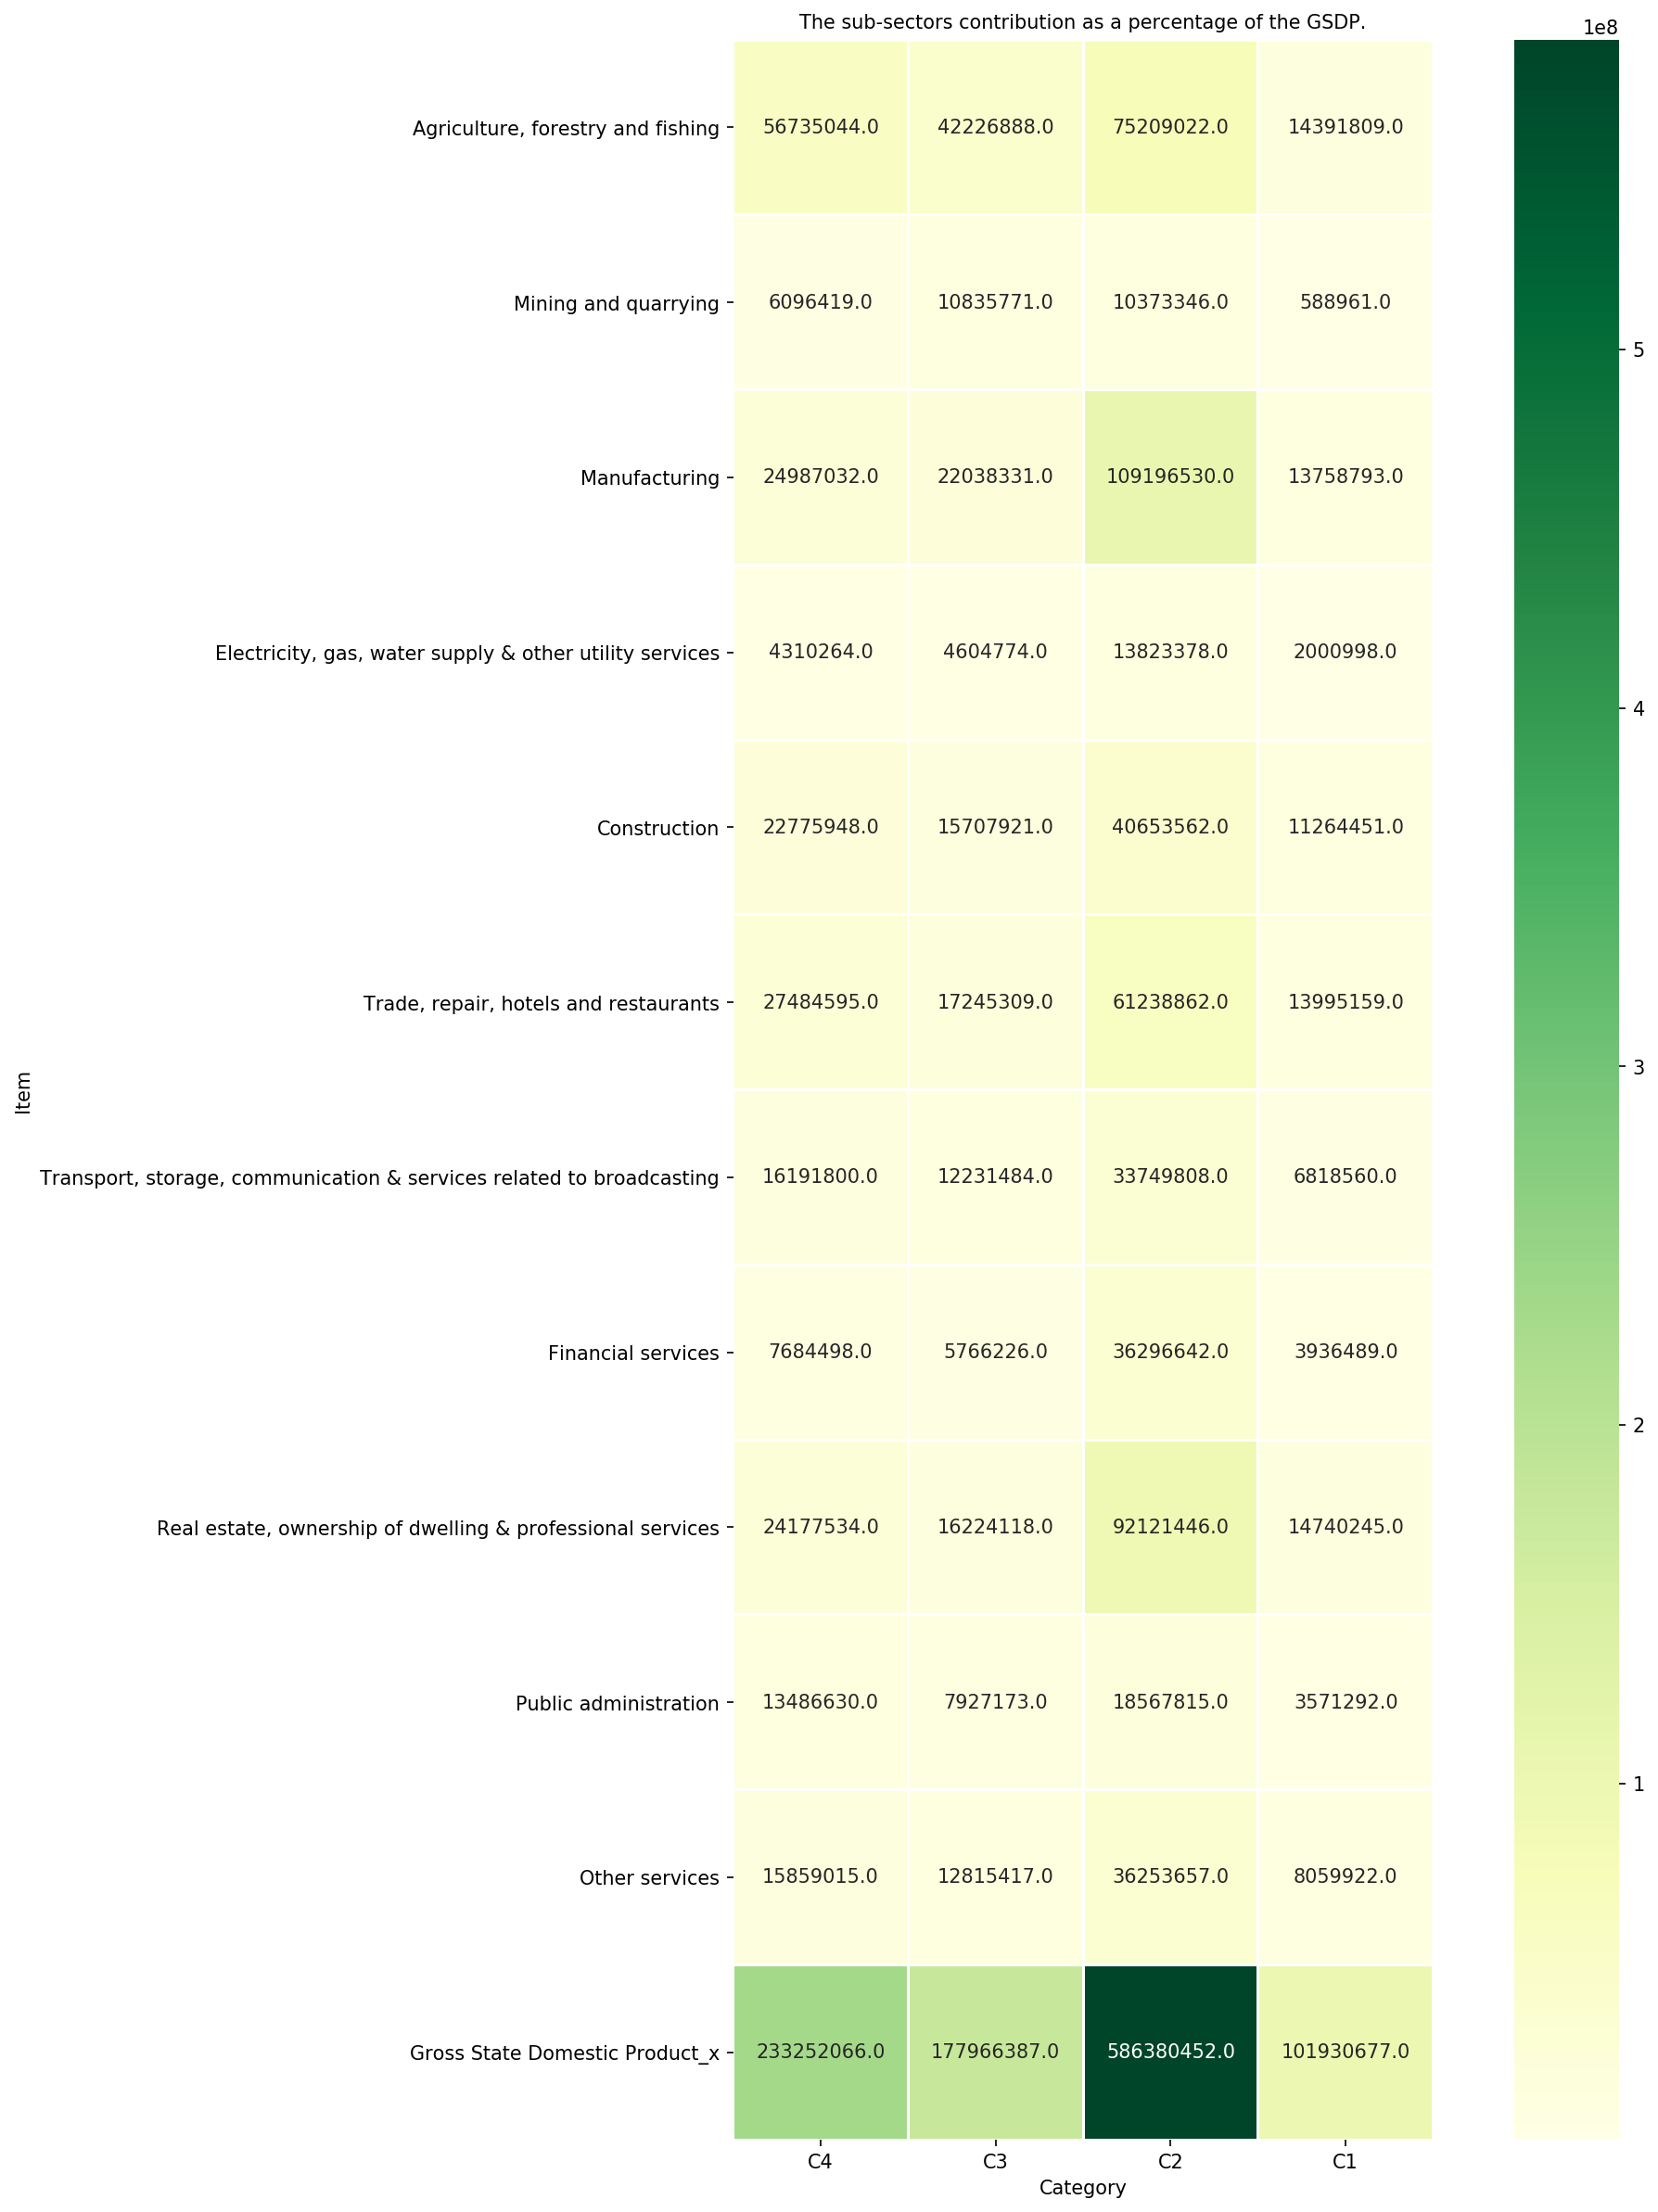

In [44]:
#sub-sectors contribution as a percentage of the GSDP of each category

plt.figure(figsize=(15,20), dpi=150)
plt.title("The sub-sectors contribution as a percentage of the GSDP.", size = 10)
df_12 = sns.heatmap(df_11, annot = True, fmt=".1f", linewidths= 1, square = True, cmap="YlGn")

# Part 2 - GDP and Education

In [45]:
#read a csv file.
df_1=pd.read_csv("../Downloads/GDP/rs_session243_au570_1.1.csv")
df_1.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [46]:
#rename the column and set the state column as index
df_1= df_1.rename(columns={"Level of Education - State" : "State"})
df_1.set_index('State', inplace = True)
df_1.head()

,Sl. No.,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
State,,,,,,,,,,,,,
A & N Islands,1,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
Andhra Pradesh,2,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
Arunachal Pradesh,3,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
Assam,4,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
Bihar,5,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [47]:
#merge two dataframes
df_2 = pd.merge(df_1,category_df, on = 'State')
df_2.head()

,Sl. No.,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015,Gross State Domestic Product,Per Capita GSDP (Rs.),Primary,Secondary,Tertiary,%tile,Category
State,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,2,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN,52646842.0,104977.0,16303716.0,10488884.0,22032942.0,0.518519,C3
Arunachal Pradesh,3,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42,1676119.0,112718.0,716959.0,287489.0,631844.0,0.555556,C2
Assam,4,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN,19809800.0,60621.0,5326697.0,4033091.0,9307109.0,0.148148,C4
Bihar,5,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN,37391988.0,33954.0,8019997.0,5984896.0,22179969.0,0.037037,C4
Goa,11,NaN,0.20,0.73,NaN,NaN,0.07,7.96,9.58,11.15,11.26,13.36,13.91,4063307.0,271793.0,312129.0,1547536.0,1738217.0,1.000000,C1


In [48]:
df_3 = df_2[["Per Capita GSDP (Rs.)","Primary - 2014-2015", "Upper Primary - 2014-2015", "Secondary - 2014-2015"]]
df_3.head()

,Per Capita GSDP (Rs.),Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
State,,,,
Andhra Pradesh,104977.0,4.35,5.20,15.71
Arunachal Pradesh,112718.0,10.89,6.71,17.11
Assam,60621.0,7.44,10.51,27.06
Bihar,33954.0,2.09,4.08,25.90
Goa,271793.0,0.20,0.07,11.15


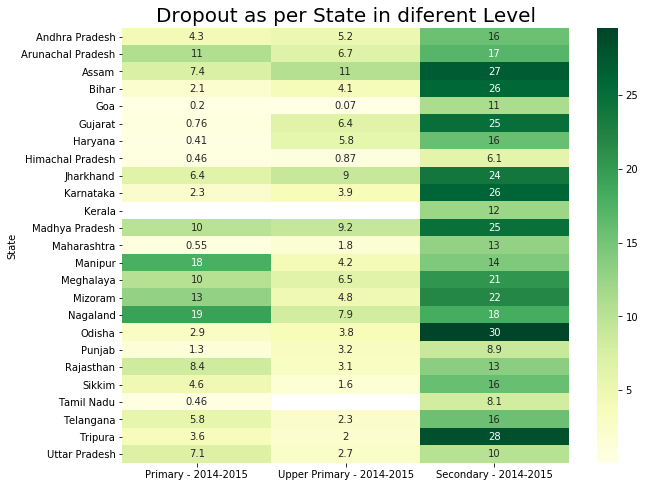

In [52]:
#plot the dropout rate of different level
df_4 = df_3[["Primary - 2014-2015", "Upper Primary - 2014-2015", "Secondary - 2014-2015"]]
plt.figure(figsize=(10,8))
plt.title("Dropout as per State in diferent Level", size = 20)
df_6 = sns.heatmap(df_4,cmap="YlGn", annot = True)

In [51]:
#Correlation matrix
corr=df_3.corr()
corr.style.background_gradient(cmap='coolwarm')

,Per Capita GSDP (Rs.),Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
Per Capita GSDP (Rs.),1,-0.4718,-0.52432,-0.446081
Primary - 2014-2015,-0.4718,1,0.451804,0.125298
Upper Primary - 2014-2015,-0.52432,0.451804,1,0.515896
Secondary - 2014-2015,-0.446081,0.125298,0.515896,1
